In [1]:
import torch
import tensorflow as tf
import numpy as np

In [2]:
x = np.array([[25, 2], [5, 26], [3, 7]])

# 전치
x.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [3]:
# 파이토치 배열로 변환
x_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])

# 파이토치 배열 전치
x_pt.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

In [4]:
# 텐서플로 배열로 변환
import tensorflow as tf

x_tf = tf.Variable([[25, 2], [5, 26], [3, 7]]) 
# tf.constant() 변경할 수 없는 상수 텐서를 만든다
# tf.Variable() 변경할 수 있는 변수 텐서를 만든다

x_tf = tf.transpose(x_tf)
x_tf

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]])>

In [5]:
x * 2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [6]:
x *2 + 2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [7]:
# 파이토치
x_pt * 2 + 3

tensor([[53,  7],
        [13, 55],
        [ 9, 17]])

In [8]:
torch.add(torch.mul(x_pt, 2), 3)

tensor([[53,  7],
        [13, 55],
        [ 9, 17]])

In [9]:
# 텐서플로
x_tf * 2 + 3

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[53, 13,  9],
       [ 7, 55, 17]])>

In [10]:
tf.add(tf.multiply(x_tf, 2), 3)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[53, 13,  9],
       [ 7, 55, 17]])>

In [11]:
a = x + 2
a * x

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

In [12]:
x

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [13]:
x.sum()

68

In [14]:
torch.sum(x_pt)

tensor(68)

In [15]:
tf.reduce_sum(x_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

In [16]:
x.sum(axis=0) # 열 계산

array([33, 35])

In [17]:
x.sum(axis=1) # 행 계산

array([27, 31, 10])

In [18]:
torch.sum(x_pt, dim=0)

tensor([33, 35])

In [19]:
tf.reduce_sum(x_tf, axis=1)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([33, 35])>

sum 외에도 maximum, minumum, mean, product 계산도 가능하다.

In [20]:
# 내적
# 내적은 두 벡터가 얼마나 같은 방향을 향하고 있는지 측정하는 값. 
# 벡터의 내적이 양수이면 두 벡터는 유사한 방향을, 0이면 직교(서로 수직), 음수이면 반대 방향을 가리킨다.

In [21]:
# 내적을 계산하려면 두 벡터의 크기(차원)가 같아야 한다.
X = np.array([25, 2, 5])
y = np.array([0, 1, 2])

np.dot(X, y)
# 내적은 요소를 곱한 후 모두 더한다. 25*0 + 2*1 + 5*2 = 12

12

In [22]:
X_pt = torch.tensor([25, 2, 5])
y_pt = torch.tensor([0, 1, 2])

X_tf = tf.Variable([25, 2, 5])
y_tf = tf.Variable([0, 1, 2])

X_pt, X_tf, y_pt, y_tf

(tensor([25,  2,  5]),
 <tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5])>,
 tensor([0, 1, 2]),
 <tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2])>)

In [23]:
np.dot(X_pt, y_pt)

torch.dot(X_pt, y_pt) # 훨씬 간단하게 계산, 직관적
torch.dot(torch.tensor([25., 2., 5.]), torch.tensor([0., 1., 2.]))
# torch.dot()은 두 벡터의 내적을 계산한다. 단 1차원 텐서만 사용할 수 있다.

tensor(12.)

In [24]:
tf.tensordot(X_tf, y_tf, axes=1)

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [25]:
tf.reduce_sum(tf.multiply(X_tf, y_tf)) # 명시적으로 원소별 곱과 합을 표현할 때 유용하다.

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [26]:
# 1번 전치 하라
y = np.array([[42, 4, 7, 99], [-99, -3, 17, 22]])
y.T

array([[ 42, -99],
       [  4,  -3],
       [  7,  17],
       [ 99,  22]])

In [27]:
# Hadamard 곱
x = np.array([[25, 10],  [-2, 1]])
y = np.array([[-1, 7], [10, 8]])

hadamard_product = x * y
hadamard_product

array([[-25,  70],
       [-20,   8]])

In [28]:
# 두 텐서의 W와 X의 내적은 무엇인가?
w = np.array([-1, 2, -2])
y = np.array([5, 10, 0])

np.dot(w, y)

15

# 선형계 풀이법

In [29]:
# 1. 치환법: 1의 계수를 갖는 연립방정식에 변수가 있을 때 유용한 메서드 (1y = y)

y = 3x
-5x + 2y = 2
-5x + 2(3x) = 2
-5x + 6x = 2
x = 2
y = 6
(x,y) = (2,6)

x + y = 6 and 2x + 3y = 16
x + y = 6
# 치환법
y = 6 -x (이항, 부호 변경)

2x + 3y = 16
2x + 3(6-x) = 16 (분배법칙)
2x + 18 -3x = 16
2x - 3x + 18 = 16
-x + 18 = 16
-x = 16 -18 (이항)
-x = -2
-1x * -1 = -2 x -1
x = 2 

# 이항은 덧셈이나 뺄셈을 할 때 사용된다. 곱셉에서는 약분하라.
-x + 4y = 0 and 2x -5y = -6
-x + 4y = 0
4y = 0 + x
4y = x 

2x -5y = -6
2(4y) - 5y = -6
8y -5y = -6
3y = -6
3으로 나눠라
y = -2 


4y = x 
4(-2) =x
x =-8

y = 4x + 1 and -4x + y  =2
y = 4x + 1

-4x + y  = 2
-4x + 4x + 1 = 2
1 = 2
# 모순, 해가 없다. 즉 두 직선은 서로 평행하여 교점이 없다.
# 두 직선은 기울기가 같고 y 절편만 다르다. 

# 소거법은 계수가 1인 변수가 연립방정식에 없을 때 사용한다.

4x -3y = 25 and -3x 8y = 10
4x -3y = 25 (3를 곱하고)
-3x 8y = 10 (4를 곱하고)

12x −9y=75
−12x +32y=40
23y = 115
23으로 나눠주면
y = 5
4x -15 = 25
4x = 40 
x = 10

-9x -15y = -15 and 3x 5y = -10
-9x -15y = -15
3x 5y = -10 (3곱하기)
9x 15 = - 30
-9x -15y = -15
0 = -15 
# 해가 없다. 교차하지 않는다.

4x + 2y = 4
-5x -3y = -7
y를 소거해준다.
3, 2를 각각 곱한다.
12x + 6y = 12
-10x -6y = -14
2x = -2 
x  = -1

4(−1)+2y=4
-4 + 2y = 4
2y = 8
y = 4

In [54]:
-15 / 24

-0.625

In [30]:
x = np.linspace(-10, 10, 1000)

y1 = 3 * X
y2 = 1 + (5*x)/2

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)

y1 = 3 * X
y2 = 1 + (5*x)/2

fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

ax.set_xlim([0, 3])
ax.set_ylim([0, 8])

ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')

plt.axvline(x=2, color='purple', linestyle='--')
_ = plt.axhline(y=6, color='purple', linestyle='--')

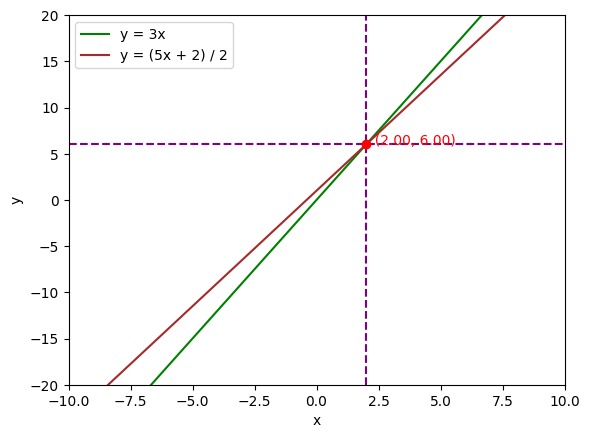

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# x 범위를 설정
x = np.linspace(-10, 10, 1000)

# 첫 번째 식: y = 3x
y1 = 3 * x

# 두 번째 식: y = (5x + 2) / 2
y2 = (5 * x + 2) / 2

# 그래프 설정
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

# x, y 범위 설정
ax.set_xlim([-10, 10])
ax.set_ylim([-20, 20])

# 두 직선을 그래프로 그리기
ax.plot(x, y1, label='y = 3x', c='green')
ax.plot(x, y2, label='y = (5x + 2) / 2', c='brown')

# 교차점을 찾아 표시
# y1 == y2일 때, 교차점 계산
from sympy import symbols, Eq, solve

# 심볼릭 계산을 사용하여 교차점 계산
x_sym = symbols('x')
eq1 = Eq(3 * x_sym, (5 * x_sym + 2) / 2)
x_intersection = solve(eq1, x_sym)[0]

# 교차점 y 값 계산
y_intersection = 3 * x_intersection

# 교차점을 그래프에 표시
ax.scatter(x_intersection, y_intersection, color='red', zorder=5)
ax.text(x_intersection, y_intersection, f'  ({x_intersection:.2f}, {y_intersection:.2f})', color='red')

# 그래프에 레이블 추가
plt.axvline(x=x_intersection, color='purple', linestyle='--')
plt.axhline(y=y_intersection, color='purple', linestyle='--')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()


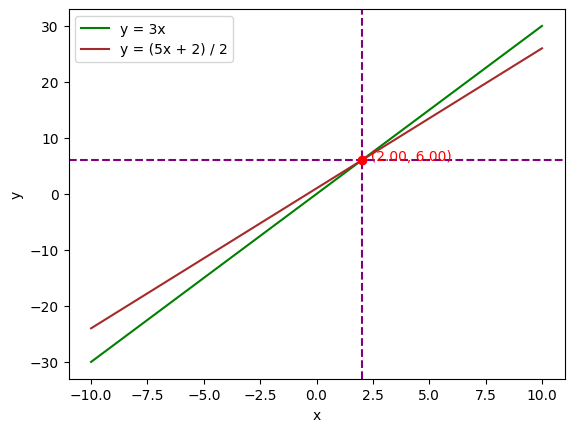

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# x 범위를 설정
x = np.linspace(-10, 10, 1000)

# 첫 번째 식: y = 3x
y1 = 3 * x

# 두 번째 식: y = (5x + 2) / 2
y2 = (5 * x + 2) / 2

# x, y 범위 설정
# ,atplotlib은 범위가 없으면 데이터를 기반으로 자동으로 적절한 범위를 선택해 준다. 
# ax.set_xlim([-10, 10])
# ax.set_ylim([-20, 20])

# 그래프 설정
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

# 두 직선을 그래프로 그리기
ax.plot(x, y1, label='y = 3x', color='green')
ax.plot(x, y2, label='y = (5x + 2) / 2', color='brown')

# 교차점을 찾아 표시
from sympy import symbols, Eq, solve

# 심볼릭 계산을 사용하여 교차점 계산
x_sym = symbols('x')
eq1 = Eq(3 * x_sym, (5 * x_sym + 2) / 2)
x_intersection = solve(eq1, x_sym)[0]

# 교차점 y 값 계산
y_intersection = 3 * x_intersection

# 교차점을 그래프에 표시
ax.scatter(x_intersection, y_intersection, color='red', zorder=5)
ax.text(x_intersection, y_intersection, f'  ({x_intersection:.2f}, {y_intersection:.2f})', color='red')

# 그래프에 레이블 추가
plt.axvline(x=x_intersection, color='purple', linestyle='--')
plt.axhline(y=y_intersection, color='purple', linestyle='--')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

# 변수 정의
x_sym, y_sym = symbols('x y')

# 방정식 정의 (좌변과 우변을 Eq() 함수로 정의)
eq1 = Eq(2 * x_sym - 3 * y_sym, 15)  # 좌변과 우변을 명확히 정의
eq2 = Eq(4 * x_sym + 10 * y_sym, 14)  # 좌변과 우변을 명확히 

# 연립방정식 풀기
solution = solve((eq1, eq2), (x_sym, y_sym))

x 교차점: 6, y 교차점: -1


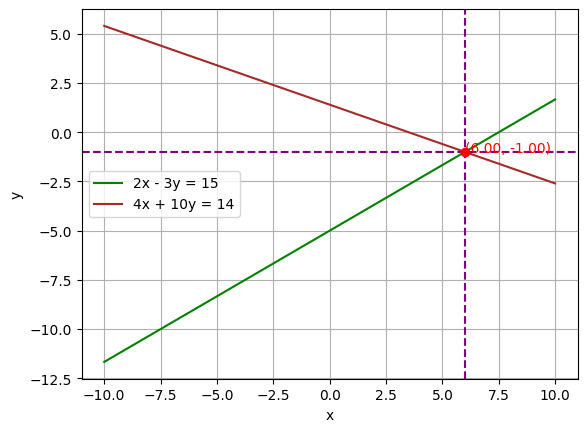

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, lambdify

# 변수 정의
x_sym, y_sym = symbols('x y')

# 방정식 정의
eq1 = Eq(2 * x_sym - 3 * y_sym, 15)
eq2 = Eq(4 * x_sym + 10 * y_sym, 14)

# 연립방정식 풀기
solution = solve((eq1, eq2), (x_sym, y_sym))
x_intersection = solution[x_sym]
y_intersection = solution[y_sym]

print(f"x 교차점: {x_intersection}, y 교차점: {y_intersection}")

# x 범위 설정
x_vals = np.linspace(-10, 10, 400)

# SymPy 방정식을 y에 대해 풀고 lambdify로 수치화
y1_expr = solve(eq1, y_sym)[0]  # eq1을 y에 대해 풀기
y2_expr = solve(eq2, y_sym)[0]  # eq2를 y에 대해 풀기

# lambdify를 사용해 SymPy 수식을 NumPy로 변환
y1_func = lambdify(x_sym, y1_expr, modules=['numpy'])
y2_func = lambdify(x_sym, y2_expr, modules=['numpy'])

# NumPy 함수로 변환한 y1_func, y2_func에 대해 y 값 계산
y1_vals = y1_func(x_vals)
y2_vals = y2_func(x_vals)

# 그래프 그리기
plt.plot(x_vals, y1_vals, label='2x - 3y = 15', color='green')
plt.plot(x_vals, y2_vals, label='4x + 10y = 14', color='brown')

# 교차점 표시
plt.scatter([x_intersection], [y_intersection], color='red', zorder=5)
plt.text(x_intersection, y_intersection, f'({x_intersection:.2f}, {y_intersection:.2f})', color='red')

# 범례와 축 설정
plt.axvline(x=x_intersection, color='purple', linestyle='--')
plt.axhline(y=y_intersection, color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


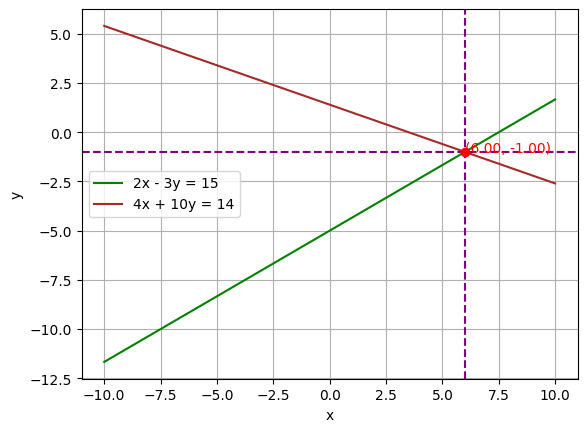

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# x 값의 범위 설정
x_vals = np.linspace(-10, 10, 400)

# 첫 번째 방정식: y = (2x - 15) / 3
y1_vals = (2 * x_vals - 15) / 3

# 두 번째 방정식: y = (14 - 4x) / 10
y2_vals = (14 - 4 * x_vals) / 10

# 그래프 설정
plt.plot(x_vals, y1_vals, label='2x - 3y = 15', color='green')
plt.plot(x_vals, y2_vals, label='4x + 10y = 14', color='brown')

# 교차점 계산 (수작업으로 구한 값)
x_intersection = (15 * 10 + 14 * 3) / (2 * 10 + 4 * 3)  # x 교차점
y_intersection = (2 * x_intersection - 15) / 3          # y 교차점

# 교차점 표시
plt.scatter([x_intersection], [y_intersection], color='red', zorder=5)
plt.text(x_intersection, y_intersection, f'({x_intersection:.2f}, {y_intersection:.2f})', color='red')

# 보조선 추가
plt.axvline(x=x_intersection, color='purple', linestyle='--')
plt.axhline(y=y_intersection, color='purple', linestyle='--')

# 그래프 꾸미기
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
